In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pily as pl

## FRANCIA: MI PAÍS ##

In [ ]:
data = pd.read_csv('Francia_sin_nulos.csv')
data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9891 entries, 0 to 9890
Data columns (total 52 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0.1                                   9891 non-null   int64  
 1   Unnamed: 0                                     9891 non-null   int64  
 2   host_id                                        9891 non-null   int64  
 3   host_response_rate                             9891 non-null   float64
 4   host_listings_count                            9891 non-null   float64
 5   host_total_listings_count                      9891 non-null   float64
 6   latitude                                       9891 non-null   float64
 7   longitude                                      9891 non-null   float64
 8   accommodates                                   9891 non-null   int64  
 9   bathrooms                                      9891 

**Procedimiento para comprobar que no haya valores nulos**

In [ ]:
#Valores nulos del df
valores_nulos = data.isnull().sum()
valores_nulos

In [ ]:
#Creo 2 df para poder procesar los outliers
#No seleccioné el 2 que es host id porque es irrelevante para los valores nulos
cuantitativas = data.iloc [ : , 3:37] #todas las filas, de la columna 3 a la 37
cualitativas = data.iloc [ : , 37:52]  

<Figure size 1500x800 with 0 Axes>

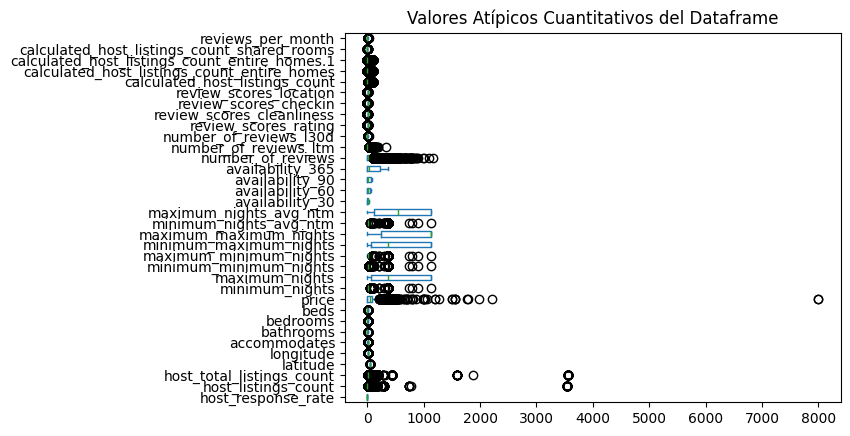

In [55]:
#Realizamos diagrama de caja o bigote de cada columna del df
fig = plt.figure(figsize=(15,8))
#el subotal para ver solamente esa variable
cuantitativas.plot(kind='box',vert=False)
plt.title('Valores Atípicos Cuantitativos del Dataframe')
plt.show() #dibujamos el diagrama

**Ejemplo para observar mas a detalle cualquier columna**

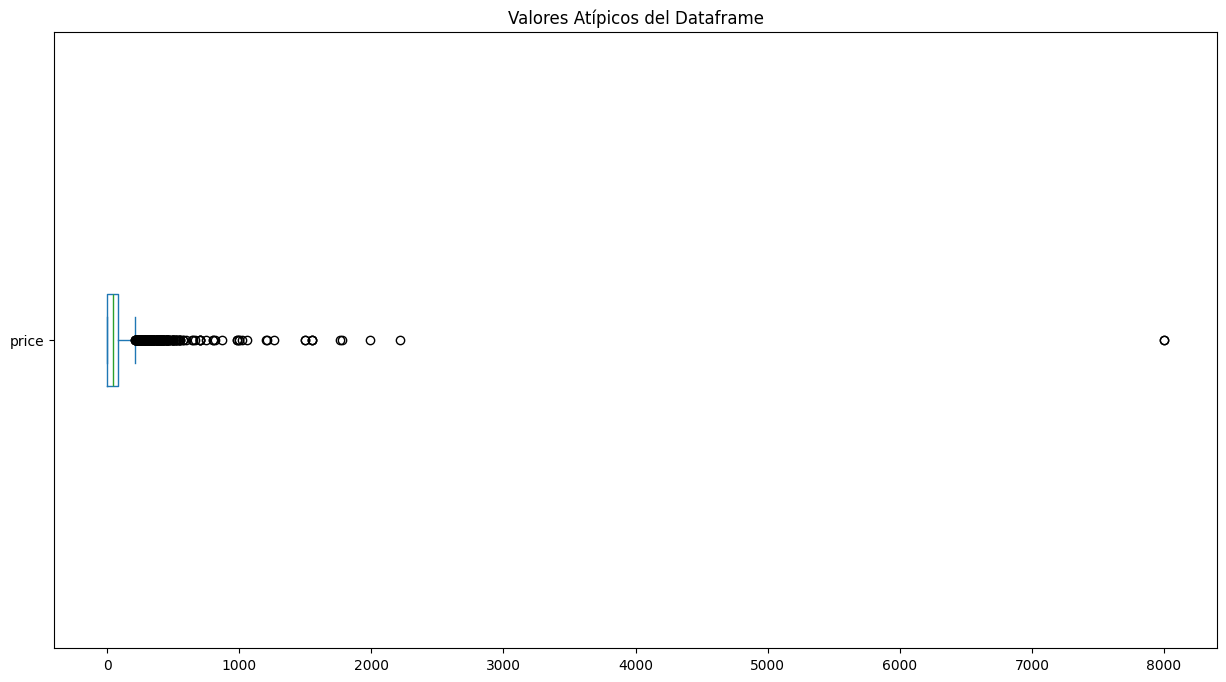

In [ ]:
#COLUMNA PRICE
fig = plt.figure(figsize=(15,8))
#el subotal para ver solamente esa variable
cuantitativas['price'].plot(kind='box',vert=False)
plt.title('Valores Atípicos del Dataframe')
plt.show() 

**PROCEDIMIENTO 'CUANTILES' PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [56]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentile25 = y.quantile (0.25)#Q1
percentile75 = y.quantile(0.75)#Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5 * iqr
Limite_Inferior_iqr = percentile25 - 1.5 * iqr

print('Limite superior permitido:',Limite_Superior_iqr)
print('Limite inferior permitido:',Limite_Inferior_iqr)

Limite superior permitido: host_response_rate                                  2.500000
host_listings_count                                 3.500000
host_total_listings_count                           6.000000
latitude                                           45.796444
longitude                                           4.888357
accommodates                                        7.000000
bathrooms                                           2.500000
bedrooms                                            3.500000
beds                                                5.000000
price                                             212.500000
minimum_nights                                     33.500000
maximum_nights                                   2722.500000
minimum_minimum_nights                             23.500000
maximum_minimum_nights                             72.000000
minimum_maximum_nights                           2722.500000
maximum_maximum_nights                           2452.5000

In [57]:
#Obtenemos datos limpios del DataFrame
#todos los que estan afuera de los bigotes, serán ahora valores nulos
data1_iqr = cuantitativas [(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data1_iqr

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,1.0,3.0,45.763140,4.829760,5.0,2.5,3.0,NaN,130.0,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,1.00,1.0,1.0,45.768420,4.827450,4.0,1.0,1.0,1.0,100.0,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,0.00,1.0,2.0,45.759300,4.825480,2.0,1.0,1.0,1.0,185.0,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,0.00,1.0,1.0,45.768845,4.854162,2.0,1.0,1.0,1.0,88.0,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,1.00,NaN,5.0,45.766950,4.832410,6.0,1.0,3.0,4.0,194.0,...,2.0,4.62,4.86,4.83,4.88,2.0,NaN,NaN,0.0,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.87,NaN,NaN,45.747560,4.849059,5.0,2.0,2.0,2.0,126.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
9887,0.87,NaN,NaN,45.757020,4.844830,6.0,1.0,2.0,2.0,82.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
9888,0.00,1.0,1.0,45.737954,4.840085,2.0,1.0,1.0,1.0,71.0,...,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.00
9889,1.00,1.0,2.0,45.744800,4.831920,4.0,1.0,2.0,2.0,NaN,...,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.00


In [58]:
#Comprobamos valores nulos del dataframe limpio
valores_nulos = data1_iqr.isnull().sum()
valores_nulos

host_response_rate                                  0
host_listings_count                              2005
host_total_listings_count                        1721
latitude                                           65
longitude                                         196
accommodates                                      266
bathrooms                                          75
bedrooms                                          191
beds                                              111
price                                             392
minimum_nights                                   2039
maximum_nights                                      0
minimum_minimum_nights                           2377
maximum_minimum_nights                           2059
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm                           2029
maximum_nights_avg_ntm                              0
availability_30             

In [59]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
#cuantitativo
data2_iqr = data1_iqr.copy()
data2_iqr = data2_iqr.fillna(round(data1_iqr.mean(),1)) #1 implica el decimal de unidades
data2_iqr

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,1.0,3.0,45.763140,4.829760,5.0,2.5,3.0,0.9,130.0,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,1.00,1.0,1.0,45.768420,4.827450,4.0,1.0,1.0,1.0,100.0,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,0.00,1.0,2.0,45.759300,4.825480,2.0,1.0,1.0,1.0,185.0,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,0.00,1.0,1.0,45.768845,4.854162,2.0,1.0,1.0,1.0,88.0,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,1.00,1.3,5.0,45.766950,4.832410,6.0,1.0,3.0,4.0,194.0,...,2.0,4.62,4.86,4.83,4.88,2.0,1.0,1.0,0.0,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.87,1.3,1.7,45.747560,4.849059,5.0,2.0,2.0,2.0,126.0,...,0.0,4.80,4.70,4.90,4.80,1.2,1.0,1.0,0.0,0.00
9887,0.87,1.3,1.7,45.757020,4.844830,6.0,1.0,2.0,2.0,82.0,...,0.0,4.80,4.70,4.90,4.80,1.2,1.0,1.0,0.0,0.00
9888,0.00,1.0,1.0,45.737954,4.840085,2.0,1.0,1.0,1.0,71.0,...,0.0,4.80,4.70,4.90,4.80,1.0,1.0,1.0,0.0,0.00
9889,1.00,1.0,2.0,45.744800,4.831920,4.0,1.0,2.0,2.0,46.1,...,0.0,4.80,4.70,4.90,4.80,1.0,1.0,1.0,0.0,0.00


In [60]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas,data2_iqr],axis=1)
Datos_limpios

,name,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,host_identity_verified,neighbourhood_cleansed,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,"Duplex avec vue, centre ville",Isabelle,2010-10-24,"Lyon, France",I'm 47 years old. I enjoy books and arts. I'm ...,within a few hours,f,5th Arrondissement,t,5e Arrondissement,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,Nice Flat in the center of Lyon,Clementine,2011-02-26,"Lyon, France",Je travaille dans le cinéma et je voyage beauc...,within an hour,f,Sin datos,t,1er Arrondissement,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,"Centre of old town,home sweet home",Polali,2011-06-03,"Lyon, France","J'ai 34 ans , je suis animatrice auprès de per...",a few days or more,f,5th Arrondissement,t,5e Arrondissement,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,"Bel apartment, 2 rooms, Lyon center",Sandrine,2011-06-06,"Lyon, France","We are a family with 3 daughters, aged 16-14-1...",Sin datos,f,Sin datos,t,6e Arrondissement,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,Quartier Terreaux 4/6 pers. Hyper centre / Clim,Giuseppina,2011-07-18,"Rhône-Alpes, France","Mon pays d'origine est l'Italie, mais je résid...",within an hour,f,1st Arrondissement,t,1er Arrondissement,...,2.0,4.62,4.86,4.83,4.88,2.0,1.0,1.0,0.0,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,Suite Rumba,Pablo,2024-09-12,Sin datos,Sin datos,within an hour,f,Sin datos,t,7e Arrondissement,...,0.0,4.80,4.70,4.90,4.80,1.2,1.0,1.0,0.0,0.00
9887,Suite Zelie,Pablo,2024-09-12,Sin datos,Sin datos,within an hour,f,Sin datos,t,3e Arrondissement,...,0.0,4.80,4.70,4.90,4.80,1.2,1.0,1.0,0.0,0.00
9888,Havre de Paix au Cœur du 7ème,Adrian,2024-12-12,Sin datos,Sin datos,Sin datos,f,Sin datos,t,7e Arrondissement,...,0.0,4.80,4.70,4.90,4.80,1.0,1.0,1.0,0.0,0.00
9889,Le Duplex avec Rooftop,Hugues,2014-02-22,"Lyon, France",Sin datos,within an hour,f,Sin datos,t,7e Arrondissement,...,0.0,4.80,4.70,4.90,4.80,1.0,1.0,1.0,0.0,0.00


In [61]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

name                                             0
host_name                                        0
host_since                                       0
host_location                                    0
host_about                                       0
host_response_time                               0
host_is_superhost                                0
host_neighbourhood                               0
host_identity_verified                           0
neighbourhood_cleansed                           0
property_type                                    0
room_type                                        0
last_review                                      0
license                                          0
instant_bookable                                 0
host_response_rate                               0
host_listings_count                              0
host_total_listings_count                        0
latitude                                         0
longitude                      

In [64]:
csv1 = pl.convertir_a_csv (valores_nulos,'Francia_sin_outliers.csv')

## MÉXICO ##

In [31]:
mexico = pd.read_csv('Mexico.csv')

In [32]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26281 non-null  int64  
 1   name                            26281 non-null  object 
 2   host_id                         26281 non-null  int64  
 3   host_name                       26278 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26281 non-null  object 
 6   latitude                        26281 non-null  float64
 7   longitude                       26281 non-null  float64
 8   room_type                       26281 non-null  object 
 9   price                           22466 non-null  float64
 10  minimum_nights                  26281 non-null  int64  
 11  number_of_reviews               26281 non-null  int64  
 12  last_review                     

In [33]:
#Eliminar la columna de neighbourhood group porque no tiene ningun valor
mexico1 = mexico.drop(columns=['neighbourhood_group','license'])

In [34]:
mexico1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26281 non-null  int64  
 1   name                            26281 non-null  object 
 2   host_id                         26281 non-null  int64  
 3   host_name                       26278 non-null  object 
 4   neighbourhood                   26281 non-null  object 
 5   latitude                        26281 non-null  float64
 6   longitude                       26281 non-null  float64
 7   room_type                       26281 non-null  object 
 8   price                           22466 non-null  float64
 9   minimum_nights                  26281 non-null  int64  
 10  number_of_reviews               26281 non-null  int64  
 11  last_review                     22985 non-null  object 
 12  reviews_per_month               

**Procedimiento para eliminar valores nulos**

In [38]:
#df sin valores nulos
mexico2 = mexico1.fillna(method = 'ffill')
mexico2

/var/folders/vk/htzm_z194jz4tflq2s4s86x80000gn/T/ipykernel_989/617027431.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mexico2 = mexico1.fillna(method = 'ffill')


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,499553,"Deluxe 4-BR penthouse, views, historic center",1297488,Petra,Cuauhtémoc,19.436210,-99.138740,Entire home/apt,4985.0,3,26,2024-10-28,0.17,2,117,1
1,501037,The best cheap flat in La Condesa!!,1364145,Humberto,Cuauhtémoc,19.415780,-99.174250,Entire home/apt,1150.0,5,134,2024-12-03,0.89,2,232,23
2,517503,Nice big room near airport,2547499,Irma Adriana,Venustiano Carranza,19.437840,-99.079030,Private room,550.0,1,281,2024-12-11,3.43,1,339,52
3,527473,"Nuestro bello departamento, un paraíso en la C...",158585,Fernando,Cuauhtémoc,19.418870,-99.173330,Entire home/apt,3654.0,1,354,2024-12-02,2.35,1,216,32
4,544105,Polanco great location! Priv Room in Shared Apart,2674950,Elizabeth,Miguel Hidalgo,19.442892,-99.201385,Private room,1007.0,2,67,2024-11-26,0.74,1,173,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,Suite Dumas Polanco 8D,369403303,Grissell,Miguel Hidalgo,19.436998,-99.196733,Private room,760.0,1,0,2024-12-26,1.00,12,363,0
26277,1318960023050066631,Departamento amueblado en CDMX,525554527,Partner,Cuauhtémoc,19.449230,-99.136170,Entire home/apt,8897.0,1,0,2024-12-26,1.00,1,365,0
26278,1318997244771691320,hospedaje en Coyoacán CDMX,293574406,Bellanira Isabel,Coyoacán,19.316820,-99.116781,Shared room,227.0,3,0,2024-12-26,1.00,8,365,0
26279,1319078571963617776,3 recámaras 3 baños con estacionamiento,35255741,Juan,Miguel Hidalgo,19.400096,-99.172981,Entire home/apt,3125.0,1,0,2024-12-26,1.00,31,359,0


In [39]:
#Valores nulos del df
nulos = mexico2.isnull().sum()
nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [ ]:
#Creo 2 df para poder procesar los outliers
#no seleccioné la 0 y 3 porque es el ID y eso hace que no se aprecie bien en la gráfica los valores atípicos
cuantitativas = mexico2.iloc [ : , [5,6,8,9,10,12,13,14,15]] #todas las filas y las columnas seleccionadas
cualitativas = mexico2.iloc [ : , [1,3,4,7,11]] 

<Figure size 1500x800 with 0 Axes>

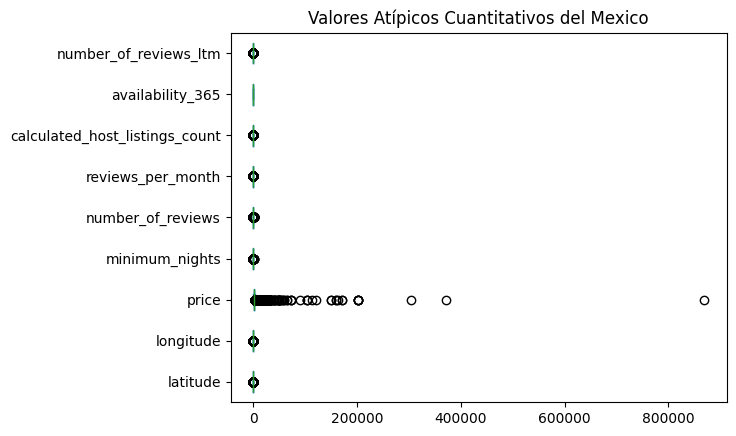

In [44]:
#Realizamos diagrama de caja o bigote de cada columna del df
fig = plt.figure(figsize=(15,8))
#el subotal para ver solamente esa variable
cuantitativas.plot(kind='box',vert=False)
plt.title('Valores Atípicos Cuantitativos del Mexico')
plt.show() #dibujamos el diagrama

**Apreciar cada columna del dataframe**

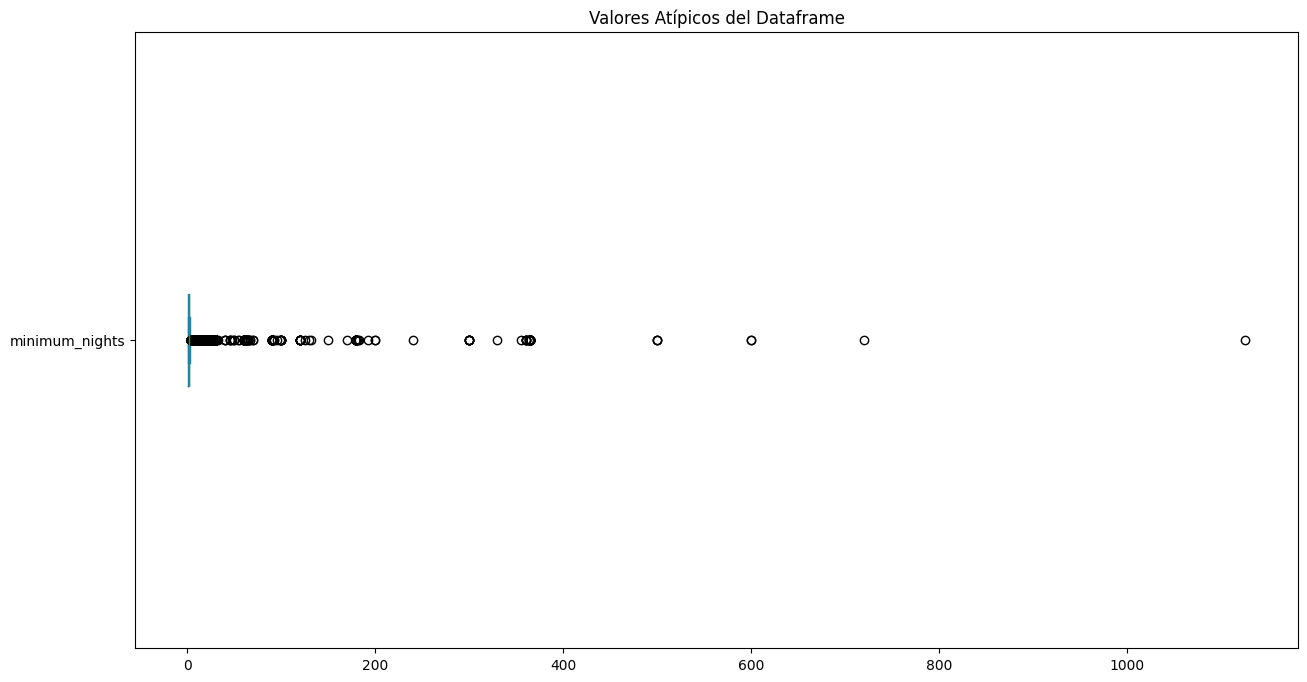

In [ ]:
#EJEMPLO CON minimum_nights
fig = plt.figure(figsize=(15,8))
#el subotal para ver solamente esa variable
cuantitativas['minimum_nights'].plot(kind='box',vert=False)
plt.title('Valores Atípicos del Dataframe')
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO 'CUANTILES' PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [48]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentile25 = y.quantile (0.25)#Q1
percentile75 = y.quantile(0.75)#Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5 * iqr
Limite_Inferior_iqr = percentile25 - 1.5 * iqr

print('Limite superior permitido:',Limite_Superior_iqr)
print('Limite inferior permitido:',Limite_Inferior_iqr)

Limite superior permitido: latitude                            19.492980
longitude                          -99.118304
price                             3691.500000
minimum_nights                       3.500000
number_of_reviews                  148.000000
reviews_per_month                    5.645000
calculated_host_listings_count      26.000000
availability_365                   739.000000
number_of_reviews_ltm               55.000000
dtype: float64
Limite inferior permitido: latitude                            19.330100
longitude                          -99.215386
price                            -1152.500000
minimum_nights                      -0.500000
number_of_reviews                  -84.000000
reviews_per_month                   -2.635000
calculated_host_listings_count     -14.000000
availability_365                  -301.000000
number_of_reviews_ltm              -33.000000
dtype: float64


In [49]:
#Obtenemos datos limpios del DataFrame
#todos los que estan afuera de los bigotes, serán ahora valores nulos
mexico3_iqr = cuantitativas [(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
mexico3_iqr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,19.436210,-99.138740,NaN,3.0,26.0,0.17,2.0,117,1.0
1,19.415780,-99.174250,1150.0,NaN,134.0,0.89,2.0,232,23.0
2,19.437840,NaN,550.0,1.0,NaN,3.43,1.0,339,52.0
3,19.418870,-99.173330,3654.0,1.0,NaN,2.35,1.0,216,32.0
4,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...
26276,19.436998,-99.196733,760.0,1.0,0.0,1.00,12.0,363,0.0
26277,19.449230,-99.136170,NaN,1.0,0.0,1.00,1.0,365,0.0
26278,NaN,NaN,227.0,3.0,0.0,1.00,8.0,365,0.0
26279,19.400096,-99.172981,3125.0,1.0,0.0,1.00,NaN,359,0.0


In [50]:
#Comprobamos valores nulos del dataframe limpio
valores_nulos = mexico3_iqr.isnull().sum()
valores_nulos

latitude                          1812
longitude                         2843
price                             2188
minimum_nights                    3523
number_of_reviews                 2177
reviews_per_month                  986
calculated_host_listings_count    3380
availability_365                     0
number_of_reviews_ltm             1207
dtype: int64

In [51]:
#Reemplazamos valores atípicos (nulos) del dataframe con "median"
#Realizamos una copia del dataframe
#cuantitativo
mexico4_iqr = mexico3_iqr.copy()
mexico4_iqr = mexico4_iqr.fillna(round(mexico3_iqr.median(),2)) #2 implica dos decimales de unidades
mexico4_iqr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,19.436210,-99.138740,1012.0,3.0,26.0,0.17,2.0,117,1.0
1,19.415780,-99.174250,1150.0,1.0,134.0,0.89,2.0,232,23.0
2,19.437840,-99.170000,550.0,1.0,15.0,3.43,1.0,339,52.0
3,19.418870,-99.173330,3654.0,1.0,15.0,2.35,1.0,216,32.0
4,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...
26276,19.436998,-99.196733,760.0,1.0,0.0,1.00,12.0,363,0.0
26277,19.449230,-99.136170,1012.0,1.0,0.0,1.00,1.0,365,0.0
26278,19.420000,-99.170000,227.0,3.0,0.0,1.00,8.0,365,0.0
26279,19.400096,-99.172981,3125.0,1.0,0.0,1.00,2.0,359,0.0


In [52]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas,mexico4_iqr],axis=1)
Datos_limpios

,name,host_name,neighbourhood,room_type,last_review,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,"Deluxe 4-BR penthouse, views, historic center",Petra,Cuauhtémoc,Entire home/apt,2024-10-28,19.436210,-99.138740,1012.0,3.0,26.0,0.17,2.0,117,1.0
1,The best cheap flat in La Condesa!!,Humberto,Cuauhtémoc,Entire home/apt,2024-12-03,19.415780,-99.174250,1150.0,1.0,134.0,0.89,2.0,232,23.0
2,Nice big room near airport,Irma Adriana,Venustiano Carranza,Private room,2024-12-11,19.437840,-99.170000,550.0,1.0,15.0,3.43,1.0,339,52.0
3,"Nuestro bello departamento, un paraíso en la C...",Fernando,Cuauhtémoc,Entire home/apt,2024-12-02,19.418870,-99.173330,3654.0,1.0,15.0,2.35,1.0,216,32.0
4,Polanco great location! Priv Room in Shared Apart,Elizabeth,Miguel Hidalgo,Private room,2024-11-26,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,Suite Dumas Polanco 8D,Grissell,Miguel Hidalgo,Private room,2024-12-26,19.436998,-99.196733,760.0,1.0,0.0,1.00,12.0,363,0.0
26277,Departamento amueblado en CDMX,Partner,Cuauhtémoc,Entire home/apt,2024-12-26,19.449230,-99.136170,1012.0,1.0,0.0,1.00,1.0,365,0.0
26278,hospedaje en Coyoacán CDMX,Bellanira Isabel,Coyoacán,Shared room,2024-12-26,19.420000,-99.170000,227.0,3.0,0.0,1.00,8.0,365,0.0
26279,3 recámaras 3 baños con estacionamiento,Juan,Miguel Hidalgo,Entire home/apt,2024-12-26,19.400096,-99.172981,3125.0,1.0,0.0,1.00,2.0,359,0.0


In [53]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

name                              0
host_name                         0
neighbourhood                     0
room_type                         0
last_review                       0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [65]:
csv2 = pl.convertir_a_csv (valores_nulos,'Mexico_sin_outliers.csv')